# ML Exam - Lab - Exam_2021_01_15
Julian Sherollari - julian.sherollari@studio.unibo.it

## Imports

In [ ]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from plot_silhouette import plot_silhouette
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

%matplotlib inline

rnd_state = 28

## 1. Load the data and separate in X all the columns but the last one, in y the last column, then produce a pairplot of X and comment what you see

In [ ]:
file = 'exam_2021_01_15.csv'
df = pd.read_csv(file, sep = ',')

In [ ]:
X = df.drop('y', axis=1)

In [ ]:
y = df['y']

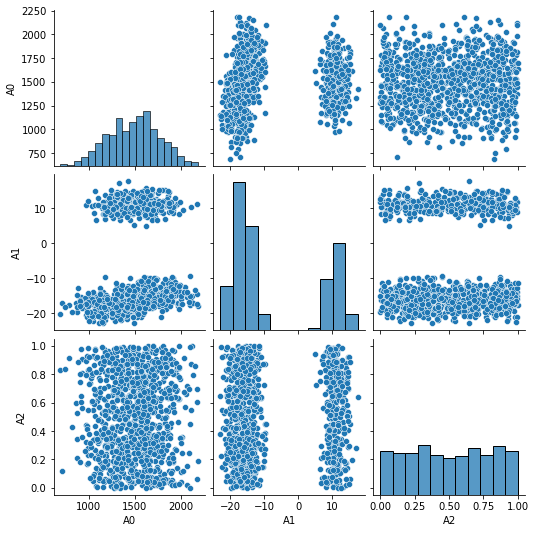

In [ ]:
sns.pairplot(X);

# Looking at the pairplots of the data, two clusters appear well defined; since this happens looking at both the tuple of variables (A0,A1) and (A1,A2), it may be possible that in 3 dimensions more clusters are present. Therefore, all 3 variables should be used to find the clusters.

## 2. Find the best clustering scheme for X with a method of your choice, plot the silhouhette index for an appropriate range of parameters and show the chosen hyperparameter(s)

KMeans will be used since looking at the pairplots there is no evidence of non-convex clusters or of outliers.

In [ ]:
k_range = range(2,11) 

In [ ]:
distortions = []
silhouette_scores = []
for i in k_range:
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=rnd_state)
    y_km = km.fit_predict(X)
    distortions.append(km.inertia_)
    silhouette_scores.append(silhouette_score(X,y_km))

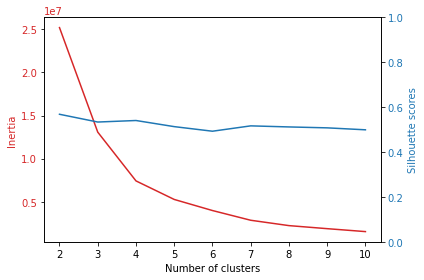

In [ ]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Inertia', color=color)
ax1.plot(k_range, distortions, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Silhouette scores', color=color)
ax2.plot(k_range, silhouette_scores, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0,1)

fig.tight_layout()
plt.show()

In [ ]:
good_k = np.argmax(silhouette_scores) + k_range.start
print("The value of K providing the maximum silhouette index is {}".format(good_k))

The value of K providing the maximum silhouette index is 2


Even though the silhouette index is maximized for 2 clusters, it is clear that the distortion is way too high. Visually, from the pairplot, change of distortion is at 4 clusters, in correspondence with a local silhouette maximum: therefore 4 will be used as K.

In [ ]:
best_k = 4

## 3. Fit the clustering scheme store the cluster labels in y_km and output the silhouette score

In [ ]:
km = KMeans(n_clusters=best_k, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=rnd_state)
y_km = km.fit_predict(X)
sil_score = silhouette_score(X,y_km)
print("The silhouette score for KMeans with {} clusters is {}".format(best_k, sil_score))

The silhouette score for KMeans with 4 clusters is 0.5405223516788928


## 4. Use the labels in the last column of the input file as the “gold standard” for the clustering and compare y_km and y; for an effective comparison, each label in y_km must be remapped to the best label in y; compute and apply this re-mapping

In [ ]:
df1 = df
df1['y_km'] = y_km

In [ ]:
ymap = {}
for value in df1['y_km'].unique():
    ymap[value] = df1.loc[df['y_km'] == value]['y'].value_counts().idxmax()

In [ ]:
df1['y_km'] = df['y_km'].map(ymap)

In [ ]:
acc = accuracy_score(df1['y_km'], df1['y'])
print("The accuracy score is: {0:.2f}%".format(acc*100))

The accuracy score is: 58.60%


## 5. Produce the confusion matrix comparing y and y_km with sklearn.metrics.confusion_matrix

In [ ]:
print(confusion_matrix(df1['y_km'], df1['y']))

[[301 141  48]
 [  0   0   0]
 [ 33 192 285]]


## 6. Consider possible pre-processing actions, repeat the fitting and evaluate as before the result of the new fitting

An example of pre-processing can be dropping one of the columns to see is something changes

In [ ]:
Xs = X.drop('A0', axis=1)

In [ ]:
distortions = []
silhouette_scores = []
for i in k_range:
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=rnd_state)
    y_km = km.fit_predict(Xs)
    distortions.append(km.inertia_)
    silhouette_scores.append(silhouette_score(Xs,y_km))

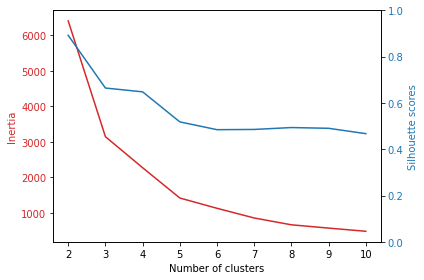

In [ ]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Inertia', color=color)
ax1.plot(k_range, distortions, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Silhouette scores', color=color)
ax2.plot(k_range, silhouette_scores, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0,1)

fig.tight_layout()
plt.show()

In [ ]:
good_k = np.argmax(silhouette_scores) + k_range.start
print("The value of K providing the maximum silhouette index is {}".format(good_k))

The value of K providing the maximum silhouette index is 2


Even though the silhouette index is maximized for 2 clusters, it is clear that the distortion is way too high. Visually, from the pairplot, change of distortion is at 3 clusters.

In [ ]:
best_k = 3

In [ ]:
km = KMeans(n_clusters=best_k, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=rnd_state)
y_km = km.fit_predict(Xs)
sil_score = silhouette_score(Xs,y_km)
print("The silhouette score for KMeans with {} clusters is {}".format(best_k, sil_score))

The silhouette score for KMeans with 3 clusters is 0.6645061420481749


In [ ]:
df1 = df
df1['y_km'] = y_km

In [ ]:
ymap = {}
for value in df1['y_km'].unique():
    ymap[value] = df1.loc[df['y_km'] == value]['y'].value_counts().idxmax()

In [ ]:
df1['y_km'] = df['y_km'].map(ymap)

In [ ]:
acc = accuracy_score(df1['y_km'], df1['y'])
print("The accuracy score is: {0:.2f}%".format(acc*100))

The accuracy score is: 88.10%


In [ ]:
print(confusion_matrix(df1['y_km'], df1['y']))

[[296   0  81]
 [  0 333   0]
 [ 38   0 252]]


Even though it is still not perfect, it is clear from both the accuracy score and the confusion matrix that after having dropped a column the clustering works better.